In [54]:
import gensim
import pyLDAvis
import pandas as pd
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from numpy import array
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [55]:
# Load the survey_clean.csv data
survey_data = pd.read_csv("./data/survey_clean.csv")
messages = survey_data["processed_message"]
messages_list = [i.split() for i in messages]

print(len(messages_list))
print(messages_list)

629
[['cerita', 'rasakan', 'tugas', 'dimensi', 'pesimis', 'tugas', 'sanggup', 'menangis', 'sadar', 'tugas', 'mudah', 'matkul', 'seperi', 'tokopedia'], ['senang', 'mempelajari', 'materi', '3d', 'materi', 'menarik', 'bermanfaat', 'suka', 'mempelajari', 'objek', '3d', 'bentuk', 'dasar', 'objek', 'kompleks', 'suka', 'mempelajari', 'teknik', 'memanipulasi', 'objek', '3d', 'suka', 'materi', 'kompleks', 'membutuhkan', 'dipelajari', 'materi', 'terkadang', 'teoritis', 'praktikal', 'perbaikan', 'berharap', 'materi', 'dikemas', 'sistematis', 'mudah', 'dipahami', 'berharap', 'materi', 'difokuskan', 'praktikum', 'mahasiswa', 'langsung', 'menerapkan', 'teori', 'dipelajari', 'pengalaman', 'asistensi', 'proses', 'asistensi', 'validasi', 'berjalan', 'asisten', 'praktikum', 'membantu', 'sabar'], ['senang', 'mempelajari', 'materi', '3d', 'materi', 'menarik', 'bermanfaat', 'suka', 'mempelajari', 'objek', '3d', 'bentuk', 'dasar', 'objek', 'kompleks', 'suka', 'mempelajari', 'teknik', 'memanipulasi', 'objek'

In [56]:
# Create bigrams and trigrams models
bigram = Phrases(messages_list, min_count=5)
trigram = Phrases(bigram[messages_list])

# Print trigram example
print(trigram[bigram[messages_list[0]]])

for idx in range(len(messages_list)):
    for token in bigram[messages_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            messages_list[idx].append(token)
    for token in trigram[bigram[messages_list[idx]]]:
        if '_' in token:
            # Token is a bigram, add to document.
            messages_list[idx].append(token)

['cerita', 'rasakan', 'tugas', 'dimensi', 'pesimis', 'tugas', 'sanggup', 'menangis', 'sadar', 'tugas', 'mudah', 'matkul', 'seperi', 'tokopedia']


In [57]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(messages_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

print(dictionary)

Dictionary<372 unique tokens: ['dimensi', 'matkul', 'menangis', 'mudah', 'tugas']...>


In [58]:
# https://radimrehurek.com/gensim/tut1.html
# build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in messages_list]
# The function doc2bow converts document (a list of words) into the bag-of-words format
"""The function doc2bow() simply counts the number of occurrences of each distinct word,
converts the word to its integer word id and returns the result as a sparse vector.
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”,
the words computer (id 0) and human (id 1) appear once;
the other ten dictionary words appear (implicitly) zero times."""
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix)  # build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

629
[(8, 1), (11, 1), (21, 1), (27, 1), (40, 2), (43, 2), (45, 1), (55, 1), (76, 6), (80, 1), (84, 1), (85, 1), (111, 1), (112, 1), (114, 1), (121, 1), (122, 1), (133, 1), (142, 1), (187, 3), (211, 2), (231, 3), (250, 1), (253, 1), (254, 3), (285, 1)]


In [59]:
# function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            iterations=100,
            alpha="auto",
            per_word_topics=True,
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

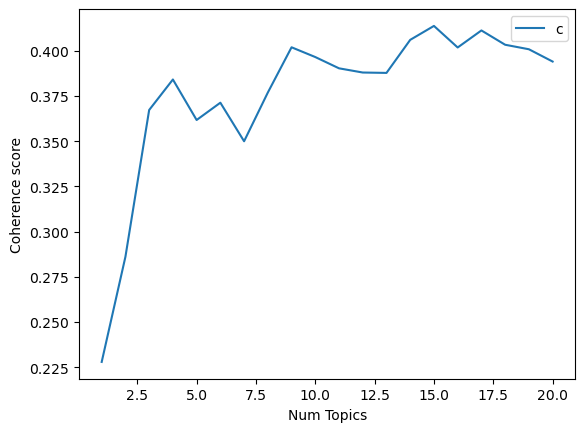

In [60]:
start = 1
limit = 21
step = 1
model_list, coherence_values = compute_coherence_values(
    dictionary,
    corpus=corpus_tfidf,
    texts=messages_list,
    start=start,
    limit=limit,
    step=step,
)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()

In [61]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.22796
Num Topics = 2  has Coherence Value of 0.286131
Num Topics = 3  has Coherence Value of 0.367313
Num Topics = 4  has Coherence Value of 0.384183
Num Topics = 5  has Coherence Value of 0.361781
Num Topics = 6  has Coherence Value of 0.371347
Num Topics = 7  has Coherence Value of 0.350012
Num Topics = 8  has Coherence Value of 0.376959
Num Topics = 9  has Coherence Value of 0.401997
Num Topics = 10  has Coherence Value of 0.3966
Num Topics = 11  has Coherence Value of 0.390361
Num Topics = 12  has Coherence Value of 0.388038
Num Topics = 13  has Coherence Value of 0.387826
Num Topics = 14  has Coherence Value of 0.406112
Num Topics = 15  has Coherence Value of 0.413816
Num Topics = 16  has Coherence Value of 0.401888
Num Topics = 17  has Coherence Value of 0.411314
Num Topics = 18  has Coherence Value of 0.403401
Num Topics = 19  has Coherence Value of 0.40091
Num Topics = 20  has Coherence Value of 0.394111


In [68]:
model = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=4,
    iterations=100,
    alpha="auto",
    per_word_topics=True,
)
for idx, topic in model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.020*"proses_asistensi" + 0.014*"rendering" + 0.014*"proses" + 0.014*"coloring_texturing" + 0.010*"pengalaman" + 0.010*"asprak" + 0.010*"cepat" + 0.010*"mudah" + 0.010*"menyenangkan" + 0.009*"bab_5"
Topic: 1 Word: 0.018*"bab_2" + 0.017*"mempelajari_materi" + 0.012*"ya_allah" + 0.011*"mudah_dipahami" + 0.011*"bab_8" + 0.010*"sabar" + 0.010*"lumayan_mudah" + 0.009*"sih" + 0.009*"lumayan" + 0.009*"mempelajari"
Topic: 2 Word: 0.017*"terima_kasih" + 0.014*"produk" + 0.012*"mempelajari_materi" + 0.011*"lumayan_mudah" + 0.011*"belajar" + 0.010*"mudah" + 0.010*"teman_teman" + 0.010*"semangat" + 0.009*"laptop_kuat" + 0.009*"seru"
Topic: 3 Word: 0.014*"aplikasi_blender" + 0.011*"alhamdulillah" + 0.011*"blender" + 0.010*"asprak" + 0.009*"tugas_imgv" + 0.009*"susah" + 0.009*"materi" + 0.009*"tugas" + 0.008*"bab_1" + 0.008*"3d"


In [69]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t,) + x for x in model.show_topic(t, topn=10)])
df = pd.DataFrame(top_words_per_topic, columns=["Topic", "Word", "P"]).to_csv(
    "./data/top_words2.csv"
)
print(df)

None


In [70]:
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, "./data/topic_modelling.html")

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.021475  0.024333       1        1  28.662195
2      0.015920  0.037371       2        1  27.432454
1      0.056067 -0.029924       3        1  23.658649
0     -0.050513 -0.031781       4        1  20.246702, topic_info=                   Term       Freq      Total Category  logprob  loglift
30     proses_asistensi   8.000000   8.000000  Default  30.0000  30.0000
316               bab_2  10.000000  10.000000  Default  29.0000  29.0000
256  coloring_texturing   7.000000   7.000000  Default  28.0000  28.0000
216        terima_kasih  11.000000  11.000000  Default  27.0000  27.0000
22   mempelajari_materi  14.000000  14.000000  Default  26.0000  26.0000
..                  ...        ...        ...      ...      ...      ...
142              semoga   2.111566  13.603052   Topic4  -5.0753  -0.2657
20          membutuhkan   1.872020   5.544545   T